Ideas:

Talk about profile report

talk about making wxavy

talk about eda

Correlation matrices (do for other paths)

In [1]:
import pandas as pd

# Creating the Weather Profile Report

In [2]:
import pandas_profiling

#wx = pd.read_pickle("./pkl/all_wx.pkl")

# profile = wx.profile_report(title = 'Weather Profiling')
# profile.to_file(output_file='data-profiles/wx-profile.html')

# open wx-profile.html

It gives an overview of what the data looks like, the correlation, missing values, etc.

# Making Some Heatmaps with Correlation

In [12]:
avy_obs = pd.read_pickle('../data-prep/pkl/avy_obs.pkl')

In [13]:
cols = ['avpathid', 'avobsdate', 'avobstime', 'avobserverid', 'avtype',
       'avtriggertyp', 'avtrigger', 'avrelativesize', 'avdestructivesize',
       'avinterface', 'sz_vert', 'sz_horiz', 'sz_avgslope', 'sz_elev_m',
       'sz_aspect', 'term_elev_m', 'av_vert_m', 'crown_width_m', 'ch_max_cm',
       'ch_min_cm', 'ch_diff_cm', 'term_longpath', 'term_shortPath',
       'term_detail', 'term_moist', 'deb_rail', 'deb_rail_w', 'deb_rail_d',
       'deb_hwy', 'deb_hwy_w', 'deb_hwy_d', 'avcomment']

       
rail_true = avy_obs.loc[avy_obs['deb_rail'] == True, cols]

corr_matrix = rail_true.corr()

If it hit the rail

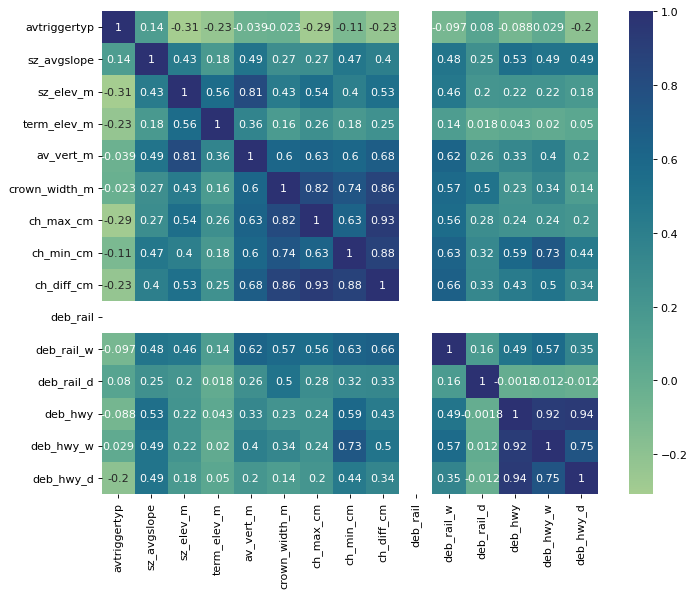

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

If it didn't hit the rail

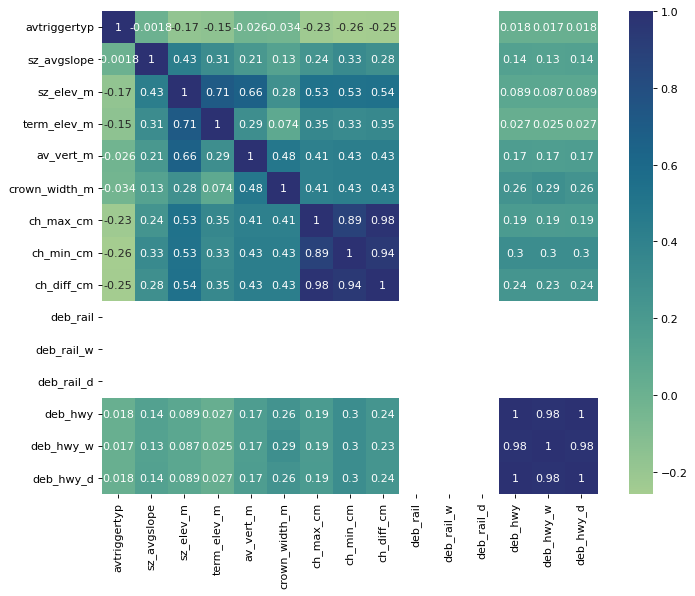

In [15]:
rail_false = avy_obs.loc[avy_obs['deb_rail'] == False, cols]

corr_matrix2 = rail_false.corr()

figure(figsize=(10, 8), dpi=80)

sns.heatmap(corr_matrix2, annot=True, cmap="crest")
plt.show()


Observations: 

Crown_width_m on true is highly correlated with ch_max_cm, ch_min_cm, ch_diff_cm compared to on false where the correlation is not very high. 

The numbers tend to be higher on the upper right three columns on true compared to false. 

# Creating the AvyWx Pkl

Reading in the avalanche and weather pickles

In [7]:
avy = pd.read_pickle("../data-prep/pkl/avy_obs.pkl")
wx = pd.read_pickle("../data-prep/pkl/all_wx.pkl")

In [8]:
avy['time'] = pd.to_datetime(avy['avobstime'], format='%H:%M:%S').dt.time
avy['dt'] = [date.replace(hour=time.hour, minute=time.minute) for date, time in zip(avy.avobsdate, avy.time)]
avy

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,...,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,time,dt
avrid,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,...,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,12:45:00,2012-03-26 12:45:00
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,...,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,08:30:00,2012-03-16 08:30:00
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,...,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,08:34:00,2012-03-16 08:34:00
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,...,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,14:50:00,2012-03-10 14:50:00
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,...,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,14:54:00,2012-03-10 14:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,...,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,05:04:00,2022-03-01 05:04:00
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,...,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,13:30:00,2022-03-23 13:30:00
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,...,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,13:30:00,2022-03-23 13:30:00


Setting the site to SHED11

In [9]:
sh11_wx = wx.loc[wx.site == 'S11MT']


Takes an avalanche by date and sees if it can find a weather date that happens close to the avalanche date. Sorts it to find the closest weather record to the avalanche and puts the data from it next to the avalanche data. 

It gets the closest weather data to the avalanche, as long as it happened before the avalanche.

In [10]:
def get_wx_record(avrid, avy_dt, wx):
    prev_wx_obs = wx.loc[wx.dt <= avy_dt].sort_values(by=['dt'], ascending=False).head(1)
    if len(prev_wx_obs) > 0: # if we have a wx obs prior to the avy
        time_diff_hrs = (avy_dt - prev_wx_obs.dt).astype('timedelta64[h]')
        if time_diff_hrs.iloc[0] < 72:
            return prev_wx_obs
        
temp_df = pd.DataFrame()

for avrid, dt in zip(avy.index, avy.dt):
    wx_record = get_wx_record(avrid, dt, sh11_wx)
    if wx_record is not None:
        wx_record['avrid'] = avrid
        temp_df = pd.concat([temp_df, wx_record])

temp_df.set_index('avrid', inplace=True)
temp_df.rename(columns={'dt': 'wx_dt'}, inplace=True)
temp_df

,wx_dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,...,snowfall_6hr,snowfall_24hr,site,file_name,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible
avrid,,,,,,,,,,,,,,,,,,,,,
368,2019-12-13 11:00:00,23.0,21.0,92.0,NaN,NaN,SW,5G17,NaN,29.7,...,1.9,1.6,S11MT,S11MT-2019.html,2019,NaN,NaN,NaN,NaN,NaN
369,2019-12-20 14:00:00,32.0,29.0,88.0,NaN,23.0,SW,11G31,NaN,31.5,...,1.3,4.1,S11MT,S11MT-2019.html,2019,NaN,NaN,NaN,NaN,NaN
370,2019-12-20 14:00:00,32.0,29.0,88.0,NaN,23.0,SW,11G31,NaN,31.5,...,1.3,4.1,S11MT,S11MT-2019.html,2019,NaN,NaN,NaN,NaN,NaN
371,2020-01-01 11:00:00,27.0,26.0,95.0,NaN,NaN,SW,4G13,NaN,32.0,...,0.0,NaN,S11MT,S11MT-2020.html,2020,NaN,NaN,NaN,NaN,NaN
372,2020-01-01 13:00:00,28.0,27.0,95.0,NaN,NaN,SW,4G13,NaN,33.3,...,0.4,NaN,S11MT,S11MT-2020.html,2020,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2022-03-01 05:00:00,31.0,30.0,96.0,NaN,NaN,NW,4G15,NaN,79.8,...,0.2,11.1,S11MT,S11MT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
505,2022-03-23 13:00:00,38.0,31.0,77.0,NaN,NaN,WNW,3G11,NaN,85.3,...,0.0,0.0,S11MT,S11MT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
506,2022-03-23 13:00:00,38.0,31.0,77.0,NaN,NaN,WNW,3G11,NaN,85.3,...,0.0,0.0,S11MT,S11MT-2022.html,2022,NaN,NaN,NaN,NaN,NaN


In [11]:
avy_obs_with_wx = pd.concat([avy, temp_df], axis='columns')

pd.set_option("display.max_columns", None)

avy_obs_with_wx

,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,avtrigger,avrelativesize,avdestructivesize,avinterface,sz_vert,sz_horiz,sz_avgslope,sz_elev_m,sz_aspect,term_elev_m,av_vert_m,crown_width_m,ch_max_cm,ch_min_cm,ch_diff_cm,term_longpath,term_shortPath,term_detail,term_moist,deb_rail,deb_rail_w,deb_rail_d,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,time,dt,wx_dt,temp,dew_pt,rH,heat_idx,wind_chill,wind_dir,wind_spd,hr_precip,snow_depth,snowfall_3hr,snowfall_6hr,snowfall_24hr,site,file_name,year,sea_lvl_press,sta_press,altimeter_setting,solar_radiation,pct_possible
avrid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,SHED10,2012-03-26,12:45:00,stein_01,WS,5.0,NL,R1,D1.5,O,B,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet slab released on SE aspect @ 5400 feet (16...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,12:45:00,2012-03-26 12:45:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PATH1163,2012-03-16,08:30:00,stein_01,U,5.0,NU,U,D2,U,U,U,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Wet debris ran 2/3 path in main path to 4700 f...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,08:30:00,2012-03-16 08:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CURLY,2012-03-16,08:34:00,stein_01,U,5.0,NU,U,D1,U,U,U,0,0,NaN,0,0,0,0,0,0,TR,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,Terminus at canyon floor elevation.\r\n\r\nDeb...,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,08:34:00,2012-03-16 08:34:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SHED10,2012-03-10,14:50:00,stein_01,WL,5.0,NaN,R2,D1,I,M,R,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,14:50:00,2012-03-10 14:50:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,INFINITY,2012-03-10,14:54:00,stein_01,L,5.0,N,R2,D1,I,T,C,0,0,NaN,0,0,0,0,0,0,TK,NaN,NaN,NaN,False,0.0,0.0,False,0.0,0.0,D1.5- 1/2 Path.,ed,2016-03-17 11:50:56,10.173.132.2,NaN,0000-00-00 00:00:00,NaN,14:54:00,2012-03-10 14:54:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,NC,R2,D2,I,T,L,38,2015,E,1760,255,0,0,0,0,TK,-,U,U,False,0.0,0.0,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,05:04:00,2022-03-01 05:04:00,2022-03-01 05:00:00,31.0,30.0,96.0,NaN,NaN,NW,4G15,NaN,79.8,0.0,0.2,11.1,S11MT,S11MT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
505,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,NU,R1,D1.5,O,T,U,0,1830,SW,1460,370,0,0,0,0,TR,-,U,W,False,0.0,0.0,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,13:30:00,2022-03-23 13:30:00,2022-03-23 13:00:00,38.0,31.0,77.0,NaN,NaN,WNW,3G11,NaN,85.3,0.0,0.0,0.0,S11MT,S11MT-2022.html,2022,NaN,NaN,NaN,NaN,NaN
506,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,N,R2,D2,O,T,C,40,2075,SE,1646,429,0,0,0,0,TK,-,U,W,False,0.0,0.0,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,13:30:00,2022-03-23 13:30:00,2022-03-23 13:00:00,38.0,31.0,77.0,NaN,NaN,WNW,3G11,NaN,85.3,0.0,0.0,0.0,S11MT,S11MT-2022.html,2022,NaN,NaN,NaN,NaN,NaN


Getting rid of columns that are unnecessary for what we are doing

In [12]:
avy_obs_with_wx.columns

Index(['avpathid', 'avobsdate', 'avobstime', 'avobserverid', 'avtype',
       'avtriggertyp', 'avtrigger', 'avrelativesize', 'avdestructivesize',
       'avinterface', 'sz_vert', 'sz_horiz', 'sz_avgslope', 'sz_elev_m',
       'sz_aspect', 'term_elev_m', 'av_vert_m', 'crown_width_m', 'ch_max_cm',
       'ch_min_cm', 'ch_diff_cm', 'term_longpath', 'term_shortPath',
       'term_detail', 'term_moist', 'deb_rail', 'deb_rail_w', 'deb_rail_d',
       'deb_hwy', 'deb_hwy_w', 'deb_hwy_d', 'avcomment', 'edcr_user',
       'edcr_time', 'edcr_ip', 'eded_user', 'eded_time', 'eded_ip', 'time',
       'dt', 'wx_dt', 'temp', 'dew_pt', 'rH', 'heat_idx', 'wind_chill',
       'wind_dir', 'wind_spd', 'hr_precip', 'snow_depth', 'snowfall_3hr',
       'snowfall_6hr', 'snowfall_24hr', 'site', 'file_name', 'year',
       'sea_lvl_press', 'sta_press', 'altimeter_setting', 'solar_radiation',
       'pct_possible'],
      dtype='object')

In [13]:
cols = ['avpathid', 'avobsdate', 'avobstime', 'avtype',
       'avtriggertyp', 'avtrigger', 'avrelativesize', 'avdestructivesize',
       'avinterface', 'sz_vert', 'sz_horiz', 'sz_avgslope', 'sz_elev_m',
       'sz_aspect', 'term_elev_m', 'av_vert_m', 'crown_width_m', 'ch_max_cm',
       'ch_min_cm', 'ch_diff_cm', 'term_longpath', 'term_shortPath',
       'term_detail', 'term_moist', 'deb_rail', 'deb_rail_w', 'deb_rail_d',
       'deb_hwy', 'deb_hwy_w', 'deb_hwy_d', 'time',
       'dt', 'wx_dt', 'temp', 'dew_pt', 'rH', 'heat_idx', 'wind_chill',
       'wind_dir', 'wind_spd', 'hr_precip', 'snow_depth', 'snowfall_3hr',
       'snowfall_6hr', 'snowfall_24hr', 'site', 'year',
       'sea_lvl_press', 'sta_press', 'altimeter_setting', 'solar_radiation',
       'pct_possible']


avywx = avy_obs_with_wx.loc[:, cols]

Then I made it a pickle

In [14]:
#avywx.to_pickle('data-prep/pkl/avywx2.pkl')

Looking at the data and seeing if I can find anything interesting

In [15]:
path1163 = avywx.loc[avywx['avpathid'] == "PATH1163"]


In [16]:
sf24 = path1163.loc[avywx['snowfall_24hr'].notnull()]

sf24["snowfall_24hr"].describe()

count    20.000000
mean      8.190000
std      18.686525
min       0.000000
25%       0.000000
50%       3.750000
75%       7.800000
max      84.800000
Name: snowfall_24hr, dtype: float64

In [17]:
sd = path1163.loc[avywx['snow_depth'].notnull()]

sd["snow_depth"].describe()

count    20.000000
mean     67.600000
std      13.947986
min      31.500000
25%      60.775000
50%      64.350000
75%      78.625000
max      87.000000
Name: snow_depth, dtype: float64

Looking at path JAKES

In [18]:
jakes = avywx.loc[avywx['avpathid'] == "JAKES"]

In [19]:
jakessf24 = jakes.loc[avywx['snowfall_24hr'].notnull()]

jakessf24["snowfall_24hr"].describe()

count    2.000000
mean     3.150000
std      4.454773
min      0.000000
25%      1.575000
50%      3.150000
75%      4.725000
max      6.300000
Name: snowfall_24hr, dtype: float64

In [20]:
jakessd = jakes.loc[avywx['snow_depth'].notnull()]

jakessd["snow_depth"].describe()

count     2.000000
mean     77.700000
std       9.192388
min      71.200000
25%      74.450000
50%      77.700000
75%      80.950000
max      84.200000
Name: snow_depth, dtype: float64

In [21]:
avywx["avpathid"].value_counts()

PATH1163      105
INFINITY       58
SHED10         35
SHED07W        28
SHED11         23
JAKES          20
SHED07E        17
SHED08         16
JAVA           15
AP1163H        14
GRIZZLY        13
BURNOUT        10
UMBRELLA       10
LARRY          10
SHED09L         8
CURLY           8
SHED107         7
SHED05          7
SHED09          6
GOATLICK        6
JAVAGA          5
IBEAM           5
TestSlope2      5
MCAMSER         5
SECOND          5
SHED07          4
MSHLDS          4
CB1160          4
TestSlope3      4
SHED06          4
SHED04D         3
BROKEN          3
CB1164          3
AP1183          2
CB1159          2
FRYPAN          2
SHED12          2
TestSlope1      2
ELKFENCE        2
NOSHED          1
MO              1
CB1160-3        1
1155CUTBAN      1
ELKMTN          1
ESSEXMTN        1
HANGINGNO       1
MCAMNF          1
SHED07WP        1
Name: avpathid, dtype: int64